In [1]:
import itertools
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.decomposition import PCA

## Préparation des données

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.iloc[:, 1:-1]
y_train = train.loc[:, 'cluster']

X_test = test.iloc[:, 1:-1]
y_test = test.loc[:, 'cluster']

std_scaler = StandardScaler().fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

scores = []

## Régression logistique

In [3]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'C': np.logspace(-4, 5, 10), 'penalty': ['l1', 'l2']}

# Régression logistique avec recherche d'hyperparamètre par validation croisée
lr = GridSearchCV(LogisticRegression(), # une régression logistique
                   param_grid, # hyperparamètres à tester
                   cv=5, # nombre de folds de validation croisée
                  )

# Optimiser ce classifieur sur le jeu d'entraînement
lr.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux et le score sur le jeu de test
print(f"Régression logistique (OVR)")
print(f"Meilleurs hyperparamètres : {lr.best_params_}")
print(f"Meilleur score obtenu: {100*lr.score(X_test_std, y_test):0.3f} %")

scores.append(('Régression logistique (OVR)', 100*lr.score(X_test_std, y_test)))

Régression logistique (OVR)
Meilleurs hyperparamètres : {'C': 100.0, 'penalty': 'l1'}
Meilleur score obtenu: 89.355 %


In [4]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'estimator__C': np.logspace(-4, 5, 10), 'estimator__penalty': ['l1', 'l2']}

# Régression logistique avec recherche d'hyperparamètre par validation croisée
lr = GridSearchCV(OneVsOneClassifier(LogisticRegression()), # une régression logistique
                   param_grid, # hyperparamètres à tester
                   cv=5, # nombre de folds de validation croisée
                  )

# Optimiser ce classifieur sur le jeu d'entraînement
lr.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux et le score sur le jeu de test
print(f"Régression logistique (OVO)")
print(f"Meilleurs hyperparamètres : {lr.best_params_}")
print(f"Meilleur score obtenu: {100*lr.score(X_test_std, y_test):0.3f} %")

scores.append(('Régression logistique (OVO)', 100*lr.score(X_test_std, y_test)))

Régression logistique (OVO)
Meilleurs hyperparamètres : {'estimator__C': 100000.0, 'estimator__penalty': 'l1'}
Meilleur score obtenu: 95.087 %


## Linear SVC 

In [5]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'C': np.logspace(-4, 5, 10), 'penalty': ['l1', 'l2']}

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
svc = GridSearchCV(LinearSVC(multi_class='ovr', dual=False), # un classifieur kNN
                   param_grid, # hyperparamètres à tester
                   cv=5, # nombre de folds de validation croisée
                  )

# Optimiser ce classifieur sur le jeu d'entraînement
svc.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux et le score sur le jeu de test
print(f"Linear SVC (OVR)")
print(f"Meilleurs hyperparamètres : {svc.best_params_}")
print(f"Meilleur score obtenu: {100*svc.score(X_test_std, y_test):0.3f} %")

scores.append(('SVC (OVR)', 100*svc.score(X_test_std, y_test)))

Linear SVC (OVR)
Meilleurs hyperparamètres : {'C': 1000.0, 'penalty': 'l1'}
Meilleur score obtenu: 88.639 %


In [6]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'C': np.logspace(-4, 5, 10), 'penalty': ['l1', 'l2']}

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
svc = GridSearchCV(LinearSVC(multi_class='crammer_singer', dual=False), # un classifieur kNN
                   param_grid, # hyperparamètres à tester
                   cv=5, # nombre de folds de validation croisée
                  )

# Optimiser ce classifieur sur le jeu d'entraînement
svc.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux et le score sur le jeu de test
print(f"Linear SVC (Crammer-Singer)")
print(f"Meilleurs hyperparamètres : {svc.best_params_}")
print(f"Meilleur score obtenu: {100*svc.score(X_test_std, y_test):0.3f} %")

scores.append(('SVC (CS)', 100*svc.score(X_test_std, y_test)))

Linear SVC (Crammer-Singer)
Meilleurs hyperparamètres : {'C': 100.0, 'penalty': 'l1'}
Meilleur score obtenu: 94.371 %


In [7]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'estimator__C': np.logspace(-4, 5, 10), 'estimator__penalty': ['l1', 'l2']}

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
svc = GridSearchCV(OneVsOneClassifier(LinearSVC(dual=False)), # un classifieur kNN
                   param_grid, # hyperparamètres à tester
                   cv=5, # nombre de folds de validation croisée
                  )

# Optimiser ce classifieur sur le jeu d'entraînement
svc.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux et le score sur le jeu de test
print(f"Linear SVC (OVO)")
print(f"Meilleurs hyperparamètres : {svc.best_params_}")
print(f"Meilleur score obtenu: {100*svc.score(X_test_std, y_test):0.3f} %")

scores.append(('SVC (OVO)', 100*svc.score(X_test_std, y_test)))

Linear SVC (OVO)
Meilleurs hyperparamètres : {'estimator__C': 1000.0, 'estimator__penalty': 'l2'}
Meilleur score obtenu: 94.985 %


## k-NN

In [8]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors': np.arange(2, 10)}

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
knn = GridSearchCV(KNeighborsClassifier(), # un classifieur kNN
                   param_grid, # hyperparamètres à tester
                   cv=5, # nombre de folds de validation croisée
                  )

# Optimiser ce classifieur sur le jeu d'entraînement
knn.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux et le score sur le jeu de test
print(f"k-NN (OVR)")
print(f"Meilleur hyperparamètre : {knn.best_params_}")
print(f"Meilleur score obtenu: {100*knn.score(X_test_std, y_test):0.3f} %")

scores.append(('k-NN (OVR)', 100*knn.score(X_test_std, y_test)))

k-NN (OVR)
Meilleur hyperparamètre : {'n_neighbors': 5}
Meilleur score obtenu: 90.174 %


In [9]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'estimator__n_neighbors': np.arange(2, 10)}

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
knn = GridSearchCV(OneVsOneClassifier(KNeighborsClassifier()), # un classifieur kNN
                   param_grid, # hyperparamètres à tester
                   cv=5, # nombre de folds de validation croisée
                  )

# Optimiser ce classifieur sur le jeu d'entraînement
knn.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux et le score sur le jeu de test
print(f"k-NN (OVO)")
print(f"Meilleur hyperparamètre : {knn.best_params_}")
print(f"Meilleur score obtenu: {100*knn.score(X_test_std, y_test):0.3f} %")

scores.append(('k-NN (OVO)', 100*knn.score(X_test_std, y_test)))

k-NN (OVO)
Meilleur hyperparamètre : {'estimator__n_neighbors': 3}
Meilleur score obtenu: 88.843 %


## Random Forest

In [36]:
# Fixer les valeurs des hyperparamètres à tester
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}


# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
rf = GridSearchCV(RandomForestClassifier(), # un classifieur kNN
                   param_grid, # hyperparamètres à tester
                   cv=5, # nombre de folds de validation croisée
                  )

# Optimiser ce classifieur sur le jeu d'entraînement
rf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux et le score sur le jeu de test
print(f"Random Forest (OVR)")
print(f"Meilleur hyperparamètre : {rf.best_params_}")
print(f"Meilleur score obtenu: {100*rf.score(X_test_std, y_test):0.3f} %")

#scores.append(('k-NN', 100*knn.score(X_test_std, y_test)))

Random Forest (OVR)
Meilleur hyperparamètre : {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score obtenu: 95.292 %


In [37]:
rf.cv_results_

c:\users\serphone\envs\ds_libs_tuto\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\serphone\envs\ds_libs_tuto\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\serphone\envs\ds_libs_tuto\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\serphone\envs\d

{'mean_fit_time': array([0.44717989, 0.84639664, 1.2744453 , ..., 3.99128709, 4.48716784,
        4.98564882]),
 'mean_score_time': array([0.02020116, 0.03780212, 0.05648255, ..., 0.14976025, 0.16224027,
        0.18096027]),
 'mean_test_score': array([0.93374317, 0.93545082, 0.93647541, ..., 0.92964481, 0.92964481,
        0.9272541 ]),
 'mean_train_score': array([0.99487726, 0.99504831, 0.99504759, ..., 0.99359594, 0.99376703,
        0.99368156]),
 'param_bootstrap': masked_array(data=[True, True, True, ..., False, False, False],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 10, 10, ..., None, None, None],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 4, 4, 4],
              mask=[False, False, False, ..., False, False, False],
        

In [43]:
print(rf.cv_results_['mean_test_score'].mean())
print(rf.cv_results_['mean_test_score'].std())

0.9330613742157458
0.0022185336668160177


In [40]:
for t in rf.cv_results_['mean_test_score']:
    print(t)

0.9337431693989071
0.9354508196721312
0.9364754098360656
0.9337431693989071
0.9351092896174863
0.9357923497267759
0.9340846994535519
0.9354508196721312
0.9354508196721312
0.9364754098360656
0.9347677595628415
0.9337431693989071
0.9323770491803278
0.9347677595628415
0.9337431693989071
0.9344262295081968
0.9361338797814208
0.9340846994535519
0.9357923497267759
0.9340846994535519
0.9357923497267759
0.9337431693989071
0.9327185792349727
0.9330601092896175
0.9347677595628415
0.932035519125683
0.9351092896174863
0.9337431693989071
0.9330601092896175
0.9344262295081968
0.9340846994535519
0.9340846994535519
0.9364754098360656
0.9330601092896175
0.9337431693989071
0.9354508196721312
0.9347677595628415
0.9347677595628415
0.9337431693989071
0.9327185792349727
0.9313524590163934
0.9337431693989071
0.9337431693989071
0.9316939890710383
0.9327185792349727
0.9330601092896175
0.9347677595628415
0.9327185792349727
0.932035519125683
0.9351092896174863
0.9316939890710383
0.9327185792349727
0.932377049180

0.930327868852459
0.9316939890710383
0.930327868852459
0.9299863387978142
0.9299863387978142
0.9296448087431693
0.9299863387978142
0.9306693989071039
0.932035519125683
0.9299863387978142
0.9313524590163934
0.9269125683060109
0.9306693989071039
0.9310109289617486
0.9323770491803278
0.9316939890710383
0.9310109289617486
0.9286202185792349
0.932035519125683
0.9310109289617486
0.930327868852459
0.9310109289617486
0.9347677595628415
0.9299863387978142
0.9313524590163934
0.9293032786885246
0.9310109289617486
0.9289617486338798
0.9299863387978142
0.9293032786885246
0.9289617486338798
0.930327868852459
0.9334016393442623
0.9351092896174863
0.9361338797814208
0.9368169398907104
0.9337431693989071
0.9323770491803278
0.9334016393442623
0.9334016393442623
0.9347677595628415
0.9368169398907104
0.9340846994535519
0.9361338797814208
0.9327185792349727
0.9364754098360656
0.9351092896174863
0.9344262295081968
0.9357923497267759
0.9354508196721312
0.9344262295081968
0.9344262295081968
0.9313524590163934

In [10]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train_std, y_train)

print(f"Random forest (OVR)")
print(f"Meilleur score obtenu: {100*rf.score(X_test_std, y_test):0.3f} %")

scores.append(('Random Forest (OVR)', 100*rf.score(X_test_std, y_test)))

Random forest (OVR)
Meilleur score obtenu: 94.985 %


In [11]:
rf = OneVsOneClassifier(RandomForestClassifier(n_estimators=100))

rf.fit(X_train_std, y_train)

print(f"Random forest (OVO)")
print(f"Meilleur score obtenu: {100*rf.score(X_test_std, y_test):0.3f} %")

scores.append(('Random Forest (OVO)', 100*rf.score(X_test_std, y_test)))

Random forest (OVO)
Meilleur score obtenu: 95.087 %


## Comparaison des scores

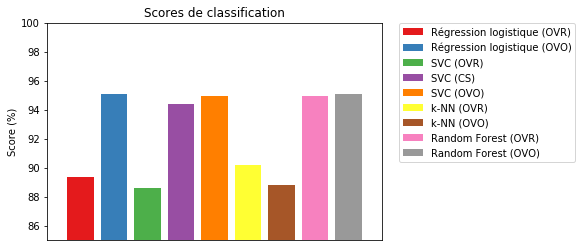

In [28]:
# On affiche les résultats pour la baseline et chaque stratégie
for i, score in enumerate(scores):
    plt.bar(i, 
            score[1],
            label=score[0],
            color=plt.cm.Set1(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Scores de classification")
plt.ylabel("Score (%)")
plt.xticks([], [])
plt.axis([-1, 9, 85, 100])
plt.show()

## Matrice de confusion

In [41]:
train.iloc[:, 1:].groupby('cluster').median()

,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate
cluster,,,,,,
0,37,280,4,9.579832,1091.855,0.000000
1,133,252,2,42.647059,612.430,0.142857
2,8,354,10,11.625000,3559.210,0.013245
3,217,259,1,7.601724,266.125,0.000000
4,30,47,1,9.400000,329.295,0.000000


In [26]:
class_names = ['Clients réguliers', 'Grossistes', 'Meilleurs clients', 'Clients perdus', 'Nouveaux clients']

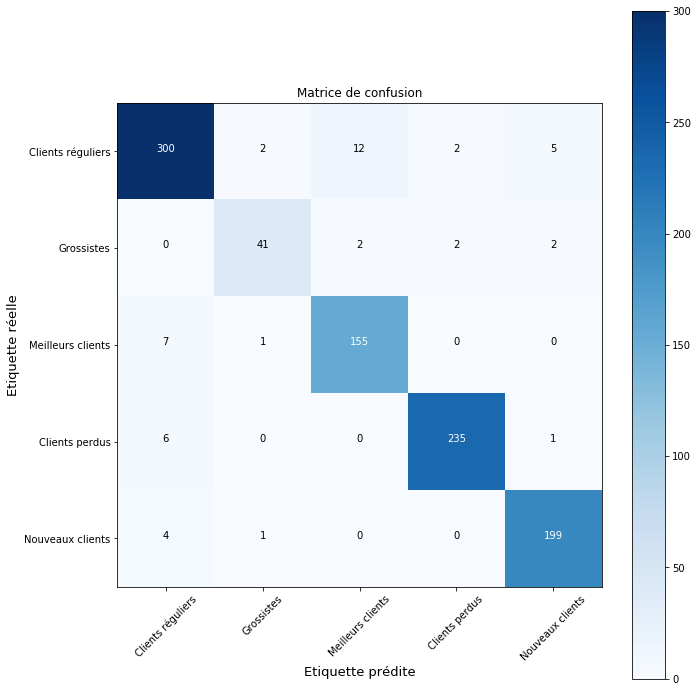

In [42]:
lr = OneVsOneClassifier(LogisticRegression(C=10000, penalty='l2'))
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(10,10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")


plt.tight_layout()
plt.ylabel('Etiquette réelle', size=13)
plt.xlabel('Etiquette prédite', size=13)

plt.show()

## Sauvegarde des paramètres

In [17]:
customers = pd.read_csv('customers_full.csv')
X = customers.iloc[:, 1:-1]
y = customers.loc[:, 'cluster']

customers.iloc[:, 1:].groupby('cluster').agg('median')

,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate
cluster,,,,,,
0,130,261,2,43.666667,601.560,0.111111
1,211,259,1,7.600000,285.145,0.000000
2,33,281,4,9.299838,1124.165,0.000000
3,7,358,11,11.602635,3878.310,0.013333
4,32,47,1,9.601990,329.350,0.000000


In [18]:
std_scaler = StandardScaler().fit(X)
X_std = std_scaler.transform(X)

lr = OneVsOneClassifier(LogisticRegression(C=10000, penalty='l2'))
lr.fit(X_std, y)

# Avant d'exporter les paramètres, il faut associer manuellement  
# les noms de clusters avec les bons numéros.
class_names = {
    1: 'Clients perdus',
    2: 'Clients réguliers',
    0: 'Grossistes',
    3: 'Meilleurs clients',
    4: 'Nouveaux clients'
}

params = {
    'scale_': std_scaler.scale_,
    'mean_': std_scaler.mean_,
    'var_': std_scaler.var_,
    'estimator': lr.estimator,
    'estimators_': lr.estimators_,
    'classes_': lr.classes_,
    'class_names': class_names
}

with open('params.pickle', 'wb') as f:
    pickle.dump(params, f)